In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider
import time
from sklearn.metrics import roc_curve, auc

In [2]:
svc = joblib.load('svc_rbf_ts7.pkl')
scaler = joblib.load('scaler2_ts7.pkl')

sourcer_params = {
  'color_model': 'yuv',                # hls, hsv, yuv, ycrcb
  'bounding_box_size': 64,             #
  'number_of_orientations': 6,        # 6 - 12
  'pixels_per_cell': 16,               # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

cls = BinaryClassifier(svc, scaler)
start_frame = imread("C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\TS\\25\\00030.ppm")
src = FeatureSourcer(sourcer_params, start_frame) 
slider = Slider(sourcer = src, classifier = cls, increment = 16)

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [3]:
def bounding_boxes_test(this_frame, ws, wp):
    
    boxed_images = []
    strips = []
    bounding_boxes_total = [] 
    y_scores_total, y_total = [], []
    for ws, wp in zip(ws, wp):
        bounding_boxes, y_scores, y = slider.locate(frame = this_frame, window_size = ws, window_position = wp)

        bounding_boxes_total.append((bounding_boxes))
        y_scores_total.append((y_scores))
        y_total.append((y))
    return bounding_boxes_total, y_scores_total, y_total


In [4]:
def y_testimg(this_frame, ws, wp, area):
    y_test_tot, per_tot = [], []
    for ws, wp in zip(ws, wp):
        y_test, per = slider.locate_test(frame = this_frame, window_size = ws, window_position = wp, area = area)
        y_test_tot.append(y_test)
        per_tot.append(per)
    return y_test_tot, per_tot

In [5]:
def detected_boxes(img):
    
    window_size = [32, 48, 64, 96, 128]
    boxes_ws, boxes_tot = [], []
    y_scores_tot, y_tot, y_scores_list, y_list = [], [], [], []

    time_tot =0
    for ws in window_size:
        incr_pix = ws//4
        wp_tot = (img.shape[0]-ws)//incr_pix + 1

        wp = incr_pix * np.arange(0,wp_tot)
        ws = ws * np.ones(wp_tot, dtype = int)

        start = time.clock()
        boxes, y_scores, y = bounding_boxes_test(img, ws, wp)
        #print (boxes)
        end = time.clock()
        boxes_ws.append(boxes)
        y_scores_tot.append(y_scores)
        y_tot.append(y)
        #print ("time for %d: %f" %(ws[0], end-start))
        time_tot = time_tot + (end-start)
        
    for boxes in boxes_ws:
        for bounding_boxes in boxes:
            for box in bounding_boxes:
                if len(box) > 0:
                    boxes_tot.append(box)
    
    for i in range(len(y_scores_tot)):
        for j in range(len(y_scores_tot[i])):
            for k in range(len(y_scores_tot[i][j])):
                y_scores_list.append(y_scores_tot[i][j][k])
                y_list.append(y_tot[i][j][k])
    #print ("time for img: %f" %(time_tot/60))
    return boxes_tot, y_scores_list, y_list

In [6]:
def y_testimg_tot(img, area):
    
    window_size = [32, 48, 64, 96, 128]
    y_test_ws, per_ws = [], []
    y_test_tot, per_tot = [], []
    time_tot =0
    for ws in window_size:
        incr_pix = ws//4
        wp_tot = (img.shape[0]-ws)//incr_pix + 1

        wp = incr_pix * np.arange(0,wp_tot)
        ws = ws * np.ones(wp_tot, dtype = int)

        start = time.clock()
        y_test, per = y_testimg(img, ws, wp, area)
  
        end = time.clock()
        y_test_ws.append(y_test)
        per_ws.append(per)
        time_tot = time_tot + (end-start)
        
    #print ("time for img: %f" %(time_tot/60))
    for i in range(len(y_test_ws)):
        for j in range(len(y_test_ws[i])):
            for k in range(len(y_test_ws[i][j])):
                 y_test_tot.append(y_test_ws[i][j][k])
                 per_tot.append(per_ws[i][j][k])   
    return y_test_tot, per_tot

In [7]:
def draw_det_boxes(boxes_tot, img):

    if len(boxes_tot) > 0:
        img = put_boxes(img, boxes_tot)
        plt.figure(figsize=(20,10))
        plt.imshow(img)
        plt.show()
    else:
        print("No Traffic signs detected in image")

    print(boxes_tot)
    print("Total detected: %d" % (len(boxes_tot)))

In [133]:
frame1 = imread("C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\GTSDB\\FullIJCNN2013\\Testimg_Bin\\601.jpg")
frame2 = imread("00601.ppm")
frame3 = imread("C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\test\\00615.ppm")
frame4 = imread("00603.ppm")


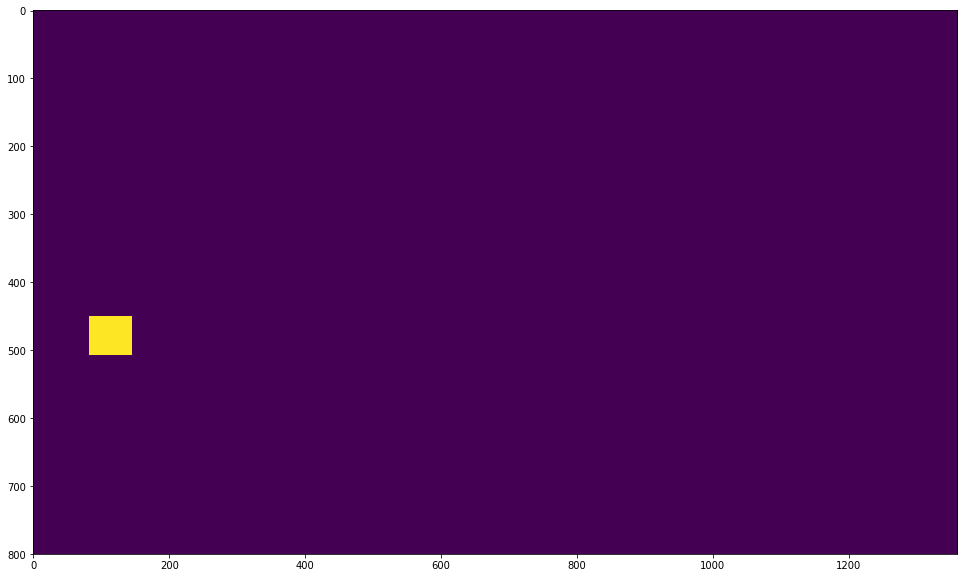

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(frame1)

plt.show()

### Saving y_test and percentage overlap from gt.txt (ground truth) 

In [203]:
test_paths = glob.glob('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\test\\*.ppm') 

with open('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\gt.txt') as f:
    content = f.read().splitlines()
filename = 'save1.p'
filename_per = 'save1_per.p'
y_test_prev = []
y_per_prev =[]
img_prev_no = 599
y_NTS = np.zeros(28824)

start = time.clock()
for i in range(852,1213):
    img_content = content[i].split(';');
    img_sel_no = int(img_content[0].split('.')[0])
    path_img = "C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\GTSDB\\FullIJCNN2013\\Testimg_Bin\\" +str(img_sel_no)+ ".jpg"
    img_shape = imread(path_img).shape
    frame = np.zeros((img_shape[0], img_shape[1]))
    frame[int(img_content[2]):int(img_content[4]), int(img_content[1]):int(img_content[3])] = 255
    area = (int(img_content[4]) -int(img_content[2])) * (int(img_content[3]) -int(img_content[1]))
    
    y_test, y_per = y_testimg_tot(frame, area)
    y_test = np.asarray(y_test)
    y_per = np.asarray(y_per)
    
    # To add y_test, if not in gt.txt file
    diff = img_sel_no - img_prev_no
    if (diff > 1):
         for k in range(diff-1):
            save_scores(filename, y_NTS)
            save_scores(filename_per, y_NTS)
            
    #If same img repeats in gt.txt file
    if img_sel_no == img_prev_no:
        y_test_prev[np.where(y_test == 1)] = 1
        y_test = y_test_prev
        y_per_prev[np.where(y_per > 0)] = y_per[np.where(y_per > 0)]
        y_per = y_per_prev
        
        remove_lastentry(filename)
        remove_lastentry(filename_per)

    if (i%50 == 0):
        print("time : %f, i = %d, img_no = %d" %((time.clock() -start)/60, i, img_sel_no))
        
    save_scores(filename, y_test)
    save_scores(filename_per, y_per)
    img_prev_no = img_sel_no
    y_test_prev = y_test
    y_per_prev = y_per
                                 

time : 1.964212, i = 900, img_no = 640
time : 4.080402, i = 950, img_no = 680
time : 6.497427, i = 1000, img_no = 728
time : 9.413539, i = 1050, img_no = 770
time : 12.739828, i = 1100, img_no = 806
time : 16.262021, i = 1150, img_no = 852
time : 20.212204, i = 1200, img_no = 891


In [41]:
def remove_lastentry(filename):
    if os.path.exists(filename):
        with open(filename,'rb') as rfp:
            y_file = pickle.load(rfp)
            y_file.pop()
        with open(filename,'wb') as wfp:
            pickle.dump(y_file, wfp)

In [13]:
y_test = y_testimg_tot(frame1, area)
y_test = np.asarray(y_test)
np.where(y_test == 1)

time for img: 0.027344


(array([24877, 24956, 24958, 25037, 27358, 27359, 27360, 27412, 27462,
        27463, 28464, 28467, 28500, 28503, 28536, 28539], dtype=int64),)

### Testing the detection function on images

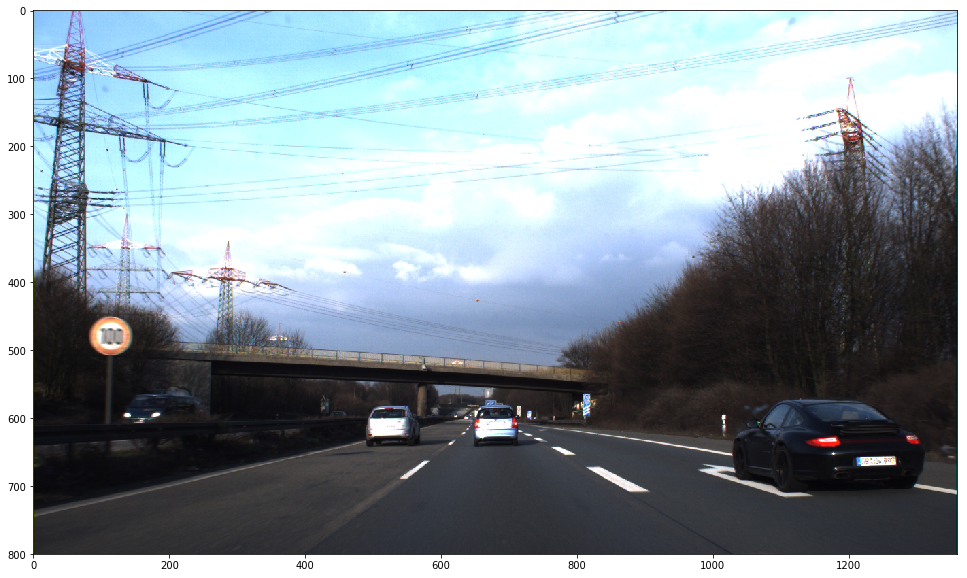

In [18]:
plt.figure(figsize=(20,10))
plt.imshow(frame2)
plt.show()

In [52]:
boxes_ws, y_scores, y_det = detected_boxes(frame2)

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


time for img: 3.150615


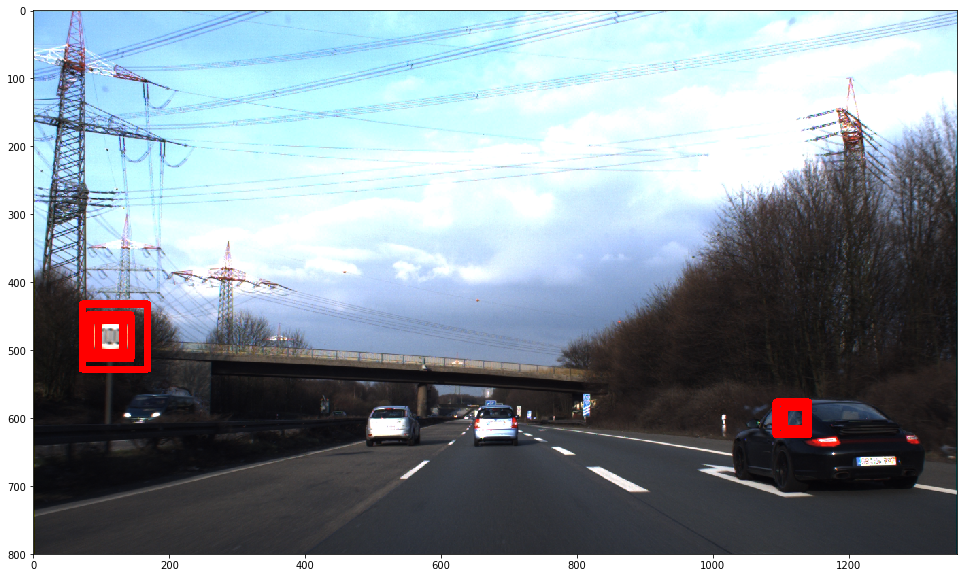

[(1104, 584, 32), (84, 456, 48), (96, 456, 48), (1092, 576, 48), (80, 448, 64), (72, 432, 96)]
Total detected: 6


In [13]:
draw_det_boxes(boxes_ws, frame2)

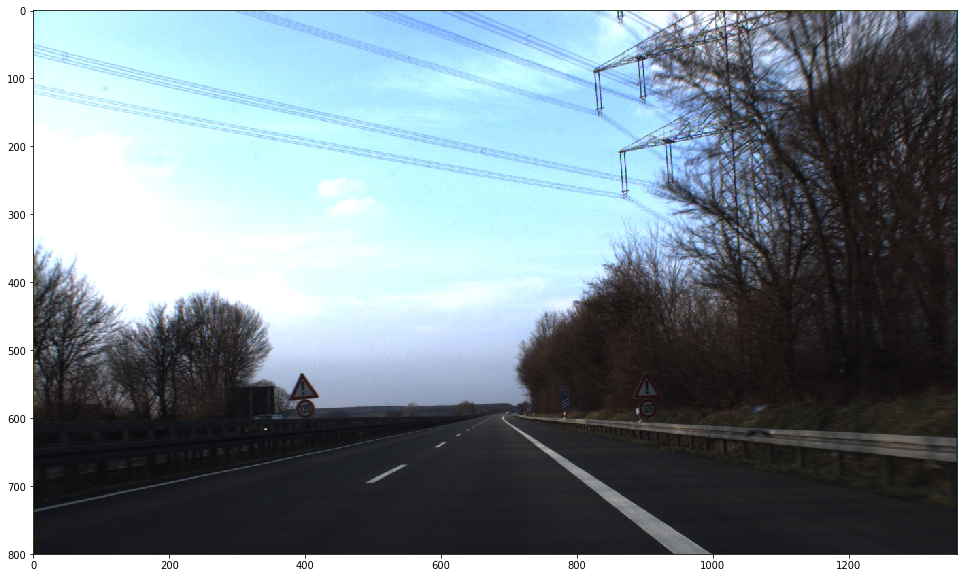

In [134]:
plt.figure(figsize=(20,10))
plt.imshow(frame3)
plt.show()

In [135]:
boxes_ws, y_scores, y_det = detected_boxes(frame3)

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


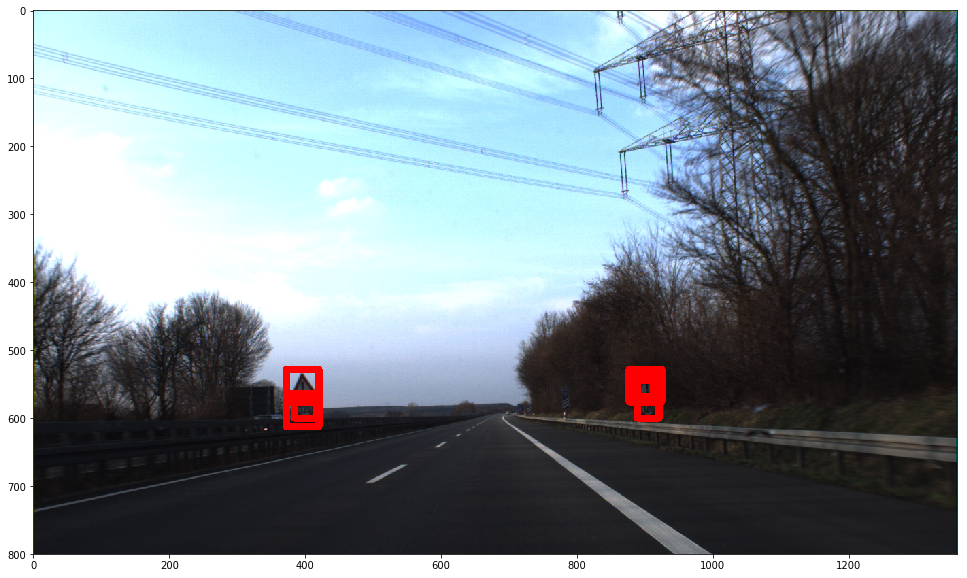

[(880, 536, 32), (888, 536, 32), (880, 544, 32), (384, 568, 32), (888, 568, 32), (372, 528, 48), (876, 528, 48), (372, 564, 48)]
Total detected: 8


In [137]:
draw_det_boxes(boxes_ws, frame3)

In [19]:
wp = 416, 416
ws = 48, 32

bounding_boxes_total, y_scores_total, y_total = bounding_boxes_test(frame6, ws, wp)
print (bounding_boxes_total)


c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


[[], [(848, 416, 32)]]


### Detecting and Saving the results of test set

In [134]:
def save_scores(filename, y_scores):
  
    scores_list =[]
   
    if os.path.exists(filename):
        # "with" statements are very handy for opening files.
        with open(filename,'rb') as rfp:
            scores = pickle.load(rfp)
            scores_list = scores

    scores_list.append(y_scores)    
    with open(filename,'wb') as wfp:
        pickle.dump(scores_list, wfp)
    

In [137]:
def save_op(file_scores, file_det, file_boxes, y_scores, y_tot, boxes_ws):
    save_scores(file_scores, y_scores)
    save_scores(file_det, y_tot)
    
    with open(file_boxes, 'a') as file_handler:
         file_handler.write("{}\n".format(boxes_ws))   


In [214]:
Testimgs_paths = glob.glob('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\test\\*.ppm') 
start = time.clock()
for n in range(0,100):
    img = imread(Testimgs_paths[n])
    boxes_ws, y_scores, y_tot = detected_boxes(img)
    save_op('save0_scor.p', 'save0_det.p', 'box_det.txt', y_scores, y_tot, boxes_ws)
    if (n%20 == 0):
        print("time : %f hr, n = %d" %((time.clock() -start)/3600, n))

c:\users\deepak reddy\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


time : 0.053261 hr, n = 0
time : 1.143884 hr, n = 20
time : 2.132237 hr, n = 40
time : 3.171051 hr, n = 60
time : 4.256668 hr, n = 80


### ROC Curve

In [12]:
# Checking for first 100 images of test set (Total is 300)
# loading score values of decision function 
with open('save0_scor.p','rb') as rfp:
    scores1 = np.asarray(pickle.load(rfp)).flatten()

# loading y_test results from ground truth file
with open('save1.p','rb') as rfp:
    y_test_tot = np.asarray(pickle.load(rfp))[0:100].flatten()
print(len(scores1), len(y_test_tot))

2882400 2882400


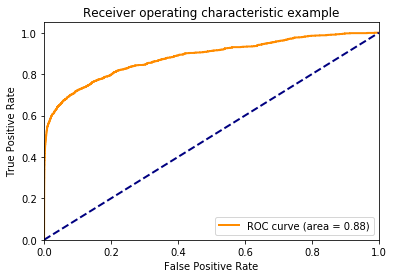

In [18]:
fpr, tpr, _ = roc_curve(y_test_tot, scores1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [6]:
fruits = ['apple', 'banana', 'cherry']
fruits.pop(1)
print(fruits)

['apple', 'cherry']


### Calculating accuracy of the test set

In [75]:
with open('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\gt.txt') as f:
    content = f.read().splitlines()
    
img_det = []
img_prev_no = 599
for i in range(852,1213):
    img_content = content[i].split(';');
    img_sel_x0, img_sel_y0, img_sel_x1, img_sel_y1 = int(img_content[1]), int(img_content[2]), int(img_content[3]), int(img_content[4])
    img_sel_no = int(img_content[0].split('.')[0])
    last = [img_sel_x0, img_sel_y0, img_sel_x1, img_sel_y1]   
    # To add y_test, if not in gt.txt file
    diff = img_sel_no - img_prev_no
    if (diff > 1):
        for k in range(diff-1):
            img_det.append([])
            
    #If same img repeats in gt.txt file
    if img_sel_no == img_prev_no:
        last = img_det.pop() + last
        
    img_det.append(last)
    img_prev_no = img_sel_no

In [72]:
with open('C:\\Users\\Deepak Reddy\\vehicle-tracking-2-master\\box_det.txt') as f:
    boxes = f.read().splitlines()
    
with open('save1_per.p','rb') as rfp:
    y_per_tot = np.asarray(pickle.load(rfp))
    
with open('save0_det.p','rb') as rfp:
    y_tot = np.asarray(pickle.load(rfp))

with open('save0_scor.p','rb') as rfp:
    dec_scores = np.asarray(pickle.load(rfp))


In [121]:
j =8
for char in '[](),':  
    boxes[j] = boxes[j].replace(char,'')
b = boxes[j].split(' ')#[1].split(' ')
print(b)

print(img_det[j])
print(np.where(y_tot[j] == 1))
per_det = y_per_tot[j][np.where(y_tot[j] == 1)]
print(per_det)
print(dec_scores[j+3][np.where(y_tot[j] == 1)])   
tp, per_tp, fp, fn = prec_recall_lists(b, img_det[j], per_det)
print(tp, np.around(per_tp,3), fp, fn)
tp_no, fp_no, fn_no = 0, 0, 0
tp_no += len(tp)
fp_no += len(fp)
fn_no += len(fn)
acc = tp_no/(tp_no + fn_no)
print(tp_no, fp_no, fn_no, acc)

['208', '512', '32', '120', '672', '32', '948', '372', '48']
[948, 370, 1001, 420]
(array([10522, 13791, 19335], dtype=int64),)
[ 0.          0.          0.86943396]
[-2.00456032 -1.62400577 -1.66034241]
[[948, 372, 48]] [ 0.869] [[208, 512, 32]] []
1 1 0 1.0


In [143]:
tp_tot, per_tot, fp_tot, fn_tot = [], [], [], []
tp_no, fp_no, fn_no = 0, 0, 0
for j in range(0, 80):
    for char in '[](),':  
        boxes[j] = boxes[j].replace(char,'')
    b = boxes[j].split(' ')

    per_det = y_per_tot[j][np.where(y_tot[j] == 1)]
 
    tp, per_tp, fp, fn = prec_recall_lists(b, img_det[j], per_det)
    tp_no += len(tp)
    fp_no += len(fp)
    fn_no += len(fn)
    tp_tot.append(tp), per_tot.append(per_tp), fp_tot.append(fp), fn_tot.append(fn)
    
acc = tp_no/(tp_no + fn_no)
prec = tp_no/(tp_no + fp_no)
print("Accuracy = %f, precision = %f" %(acc, prec))  
print(tp_no, fp_no, fn_no, (tp_no + fn_no))
#print("True positives:")
#print(tp_tot)
print("False positives:")
print(fp_tot)
#print("False negatives:")
#print(fn_tot)

Accuracy = 0.762887, precision = 0.560606
74 58 23 97
False positives:
[[], [[1104, 584, 32]], [], [], [[488, 584, 32]], [[224, 520, 32]], [], [[1208, 680, 32]], [[208, 512, 32], [120, 672, 32]], [[256, 632, 32]], [[672, 560, 64]], [], [], [], [], [], [], [], [[936, 592, 32]], [[40, 632, 32]], [], [], [], [], [[664, 384, 32]], [], [], [], [], [[1176, 360, 96]], [[504, 416, 32], [1168, 480, 32]], [[564, 408, 48]], [], [[632, 456, 32], [1272, 204, 48]], [[552, 168, 96]], [], [[840, 496, 32], [920, 584, 32]], [], [[216, 744, 32], [552, 252, 48]], [[752, 392, 32]], [], [], [], [], [[72, 456, 32]], [], [[832, 456, 32]], [[992, 456, 32]], [[904, 424, 32], [152, 464, 32], [352, 496, 32], [456, 444, 48]], [[592, 624, 64]], [[904, 56, 32], [376, 728, 32]], [[1080, 488, 32]], [[864, 328, 32], [696, 520, 32]], [[1016, 592, 32], [1128, 616, 32], [1216, 464, 64]], [[400, 136, 32], [1160, 400, 32], [1072, 680, 32]], [[288, 368, 32], [1112, 576, 32], [1224, 600, 48]], [[192, 408, 32]], [], [], [], [[

In [123]:
def prec_recall_lists(b, img_det, per_det): 
    det_no = len(b)//3
    test_det_no = len(img_det)//4
    #per_max = 0
    tp_fin, per_fin = [], []
    fp, fn = [], []

    for k in range(0,test_det_no):
        test_x0, test_y0, test_x1, test_y1  = img_det[4*k], img_det[4*k+1], img_det[4*k+2], img_det[4*k+3]
        det_x = -20
        per_max = 0
        for i in range(0,det_no):
            x, y, ws = int(b[3*i]), int(b[3*i+1]), int(b[3*i+2])
            avg_x, avg_y = x+ws//2, y+ws//2
            per_cur = per_det[i]
            
            # To detect and store the true  positive sign with max percentage
            if (test_x0 < avg_x < test_x1) and (test_y0 < avg_y < test_y1):
                if per_cur > per_max:
                    per_max = per_cur
                    det_x, det_y, det_ws = x, y, ws

        # if the sign is not detected, it goes in to false negative list
        if det_x == -20:
            fn.append([test_x0, test_y0, test_x1, test_y1])
        else:
            tp_fin.append([det_x, det_y, det_ws])
            per_fin.append(per_max)

    # If sign is detected in image and no actual sign in image aka false positive
    fp_x_prev, fp_y_prev, fp_ws_prev = -20, -20, -20  
    for i in range(0,det_no):
        x, y, ws = int(b[3*i]), int(b[3*i+1]), int(b[3*i+2])
        per_cur = per_det[i]
        # To detect and save false positives in 'fp' list
        if per_cur == 0:
            fp_x, fp_y, fp_ws = x, y, ws
            if abs(fp_x - fp_x_prev) > 20 and abs(fp_y - fp_y_prev) > 20:
                fp.append([fp_x, fp_y, fp_ws])
                fp_x_prev, fp_y_prev, fp_ws_prev = fp_x, fp_y, fp_ws

    return tp_fin, per_fin, fp, fn

In [66]:
with open('C:\\Users\\Deepak Reddy\\Desktop\\old desk\\Old_desk_04Feb18\\Python\\Trafficsign_Datasets\\
GTSDB\\FullIJCNN2013\\gt.txt') as f:
    content = f.read().splitlines()
    
img_det = []
img_prev_no = 599
for i in range(852,1213):
    img_content = content[i].split(';');
    img_sel_no = int(img_content[0].split('.')[0])
    if img_sel_no > 699:
        print(i-852, img_content)
        break

122 ['00700.ppm', '848', '348', '913', '406', '13']


In [122]:
fp_x_prev, fp_y_prev, fp_ws_prev = 3,2,1
print(fp_x_prev, fp_y_prev, fp_ws_prev)

3 2 1
